In [31]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!pip install sentence-transformers
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from gensim.models import LdaModel
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
from gensim import corpora
import gensim
from tqdm import tqdm
from sklearn.decomposition import LatentDirichletAllocation


In [34]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [35]:
data_path = '/content/drive/MyDrive/IAOS/'

with open(data_path+"cleaned.txt", "r") as file:
    content = file.read()

docs = content.split("---")
docs.pop()
for section in docs:
    print(section.strip())

print(len(docs))

determining author text difficult task compare multiple artificial intelligence techniques classifying literary texts written multiple authors taking account limited number speech parts prepositions adverbs conjunctions also introduce new dataset composed texts written romanian language run algorithms compared methods artificial neural networks multiexpression programming knearest neighbour support vector machines decision trees c50 numerical experiments show first problem difficult algorithms able generate acceptable error rates test set
paper online deep learning dlbased channel estimation algorithm doubly selective fading channels proposed employing deep neural network dnn properly selected inputs dnn exploit features channel variation previous channel estimates also extract additional features pilots received signals moreover dnn take advantages least squares estimation improve performance channel estimation dnn first trained simulated data offline manner track dynamic channel onli

In [36]:
data_path = '/content/drive/MyDrive/IAOS/'
abstracts_file_path = data_path+"cleaned.txt"
titles_file_path = data_path+"cleanedTitles.txt"

with open(abstracts_file_path, 'r') as abstracts_file:
    abstracts = abstracts_file.read().split('---')

with open(titles_file_path, 'r') as titles_file:
    titles = titles_file.read().split('---')

titles = [title.strip() for title in titles]

title_abstract_pairs = []
for i, title in enumerate(titles):
    if i < len(abstracts):
        abstract = abstracts[i].strip()
    else:
        abstract = ""  
    if abstract != "null":
        title_abstract_pairs.append((title, abstract))
title_abstract_pairs.pop()
for title, abstract in title_abstract_pairs:
    print("Title:", title)
    print("Abstract:", abstract)

Title: A Comparison of Several AI Techniques for Authorship Attribution on Romanian Texts
Abstract: determining author text difficult task compare multiple artificial intelligence techniques classifying literary texts written multiple authors taking account limited number speech parts prepositions adverbs conjunctions also introduce new dataset composed texts written romanian language run algorithms compared methods artificial neural networks multiexpression programming knearest neighbour support vector machines decision trees c50 numerical experiments show first problem difficult algorithms able generate acceptable error rates test set
Title: Deep Learning-Based Channel Estimation for Doubly Selective Fading Channels
Abstract: paper online deep learning dlbased channel estimation algorithm doubly selective fading channels proposed employing deep neural network dnn properly selected inputs dnn exploit features channel variation previous channel estimates also extract additional feature

In [37]:

#vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

sbert_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
sentence_embeddings = sbert_model.encode(docs)

#Como se comprueba si es o no similar
#cosine(sentence_embeddings[0],sbert_model.encode([String])[0])

# compute the cosine similarity matrix
cos_sim_matrix = cosine_similarity(sentence_embeddings)
cos_sim_matrix

array([[1.0000001 , 0.4300028 , 0.26863083, 0.33483303, 0.40766713,
        0.38027835, 0.5148504 , 0.5345821 , 0.5770024 , 0.38221136,
        0.24621445, 0.36458874, 0.46230596, 0.20130251, 0.23966748,
        0.21553291, 0.3297246 , 0.3297246 , 0.2956342 , 0.28737807,
        0.10408287, 0.3761117 , 0.21507601, 0.38851297, 0.16166756,
        0.33684072, 0.3245108 , 0.34296155, 0.34192145],
       [0.4300028 , 0.99999976, 0.3283623 , 0.24774978, 0.5291475 ,
        0.50707173, 0.53067183, 0.43736973, 0.54722047, 0.4808948 ,
        0.24077502, 0.4663856 , 0.386079  , 0.5383759 , 0.41200757,
        0.3234402 , 0.27271736, 0.27271736, 0.3131764 , 0.46447337,
        0.27794704, 0.5089935 , 0.31387183, 0.50473505, 0.19215178,
        0.31235385, 0.32153893, 0.40978009, 0.34513485],
       [0.26863083, 0.3283623 , 1.0000002 , 0.46900836, 0.2475353 ,
        0.31528074, 0.2047224 , 0.19701497, 0.21595415, 0.5194177 ,
        0.34004056, 0.3672076 , 0.3294863 , 0.38088417, 0.20632687,
  

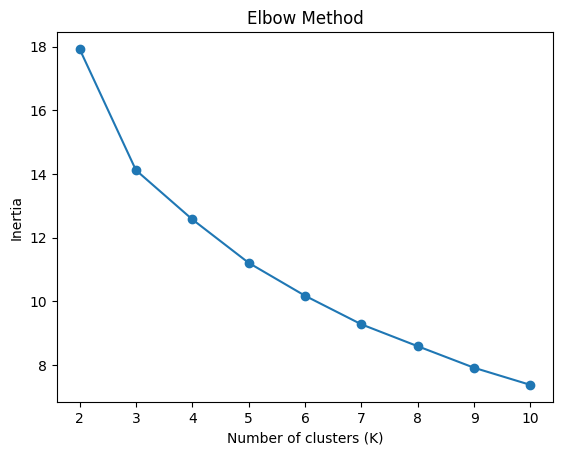

The optimal number of clusters is: 2
                                             document  cluster
0   determining author text difficult task compare...        0
1   \npaper online deep learning dlbased channel e...        0
2   \nconfronting age artificial intelligence expl...        0
3   \nobjectives assess role artificial intelligen...        0
4   \ndominant sequence transduction models based ...        0
5   \nstudy representation encoding phonemes recur...        0
6   \nneural machine translation nmt models usuall...        0
7   \nautomatic summarisation popular approach red...        0
8   \nability accurately perceive whether speaker ...        0
9   \ntechnological advancements education turned ...        0
10  \nbuildings one combination systems eg central...        0
11  \naimed establish artificial intelligence ai s...        0
12  \nworld data central piece provide novel techn...        0
13  \nproliferation 5g mobile networks within next...        0
14  \nalthough eva

In [38]:
#ELBOW METHOD
k_values = range(2, 11)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=33)
    kmeans.fit(cos_sim_matrix)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_k = np.argmin(np.diff(inertia_values)) + 2
print("The optimal number of clusters is:", optimal_k)

clustering = AgglomerativeClustering(n_clusters=optimal_k, metric='cosine', linkage='complete')
labels = clustering.fit_predict(cos_sim_matrix)

df = pd.DataFrame({'document': docs, 'cluster': labels})
print(df)




The optimal number of clusters is: 6


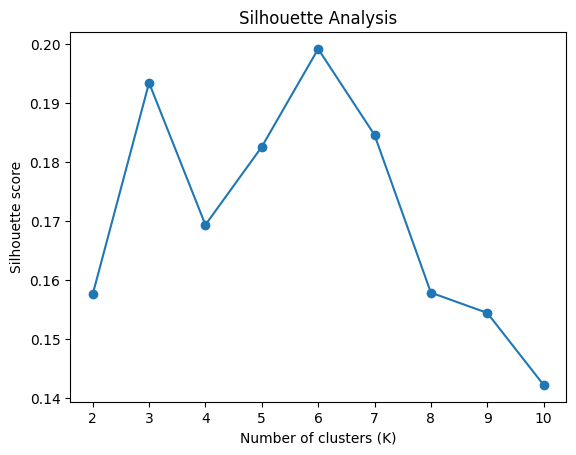

                                             document  cluster
0   determining author text difficult task compare...        5
1   \npaper online deep learning dlbased channel e...        5
2   \nconfronting age artificial intelligence expl...        4
3   \nobjectives assess role artificial intelligen...        4
4   \ndominant sequence transduction models based ...        5
5   \nstudy representation encoding phonemes recur...        5
6   \nneural machine translation nmt models usuall...        5
7   \nautomatic summarisation popular approach red...        5
8   \nability accurately perceive whether speaker ...        5
9   \ntechnological advancements education turned ...        2
10  \nbuildings one combination systems eg central...        2
11  \naimed establish artificial intelligence ai s...        4
12  \nworld data central piece provide novel techn...        4
13  \nproliferation 5g mobile networks within next...        1
14  \nalthough evaluation microsatellite instabili...  

In [39]:
k_values = range(2, 11)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=33)
    labels = kmeans.fit_predict(cos_sim_matrix)
    score = silhouette_score(cos_sim_matrix, labels)
    silhouette_scores.append(score)

optimal_k = k_values[np.argmax(silhouette_scores)]
print("The optimal number of clusters is:", optimal_k)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis')
plt.show()

clustering = AgglomerativeClustering(n_clusters=optimal_k, metric='cosine', linkage='complete')
labels = clustering.fit_predict(cos_sim_matrix)

df = pd.DataFrame({'document': docs, 'cluster': labels})
print(df)


In [40]:
X = vectorizer.fit_transform(docs)
lda = LatentDirichletAllocation(n_components=6, random_state=0)
lda.fit(X)

LatentDirichletAllocation(n_components=6, random_state=0)

In [54]:
# with open(data_path+"Topic_words.txt", 'w') as file:
#   feature_names = vectorizer.get_feature_names_out() 
  # for topic_id, topic in enumerate(lda.components_):
  #     file.write('Topic '+str(topic_id)+'--'+" ".join([feature_names[i] for i in topic.argsort()[:-6:-1]])+'\n')
  #     print(f"Topic {topic_id}:")
  #     print(" ".join([feature_names[i] for i in topic.argsort()[:-6:-1]]))
with open(data_path+"Topic_words.txt", 'w') as file:
    feature_names = vectorizer.get_feature_names_out() 
    for topic_id, topic in enumerate(lda.components_):
        topic_probabilities = topic / topic.sum()
        sorted_word_ids = topic_probabilities.argsort()[::-1][:5]
        topic_words = [(feature_names[i], topic_probabilities[i]) for i in sorted_word_ids]
        file.write(f"Topic {topic_id}: {' '.join([feature_names[i] for i in topic.argsort()[:-6:-1]])}\n")
        print(f"Topic {topic_id}: {' '.join([f'{w}: {p:.3f}' for w, p in topic_words])}")
        


Topic 0: cell: 0.014 msi: 0.011 environment: 0.008 cells: 0.008 color: 0.008
Topic 1: dr: 0.013 ai: 0.012 system: 0.011 training: 0.009 artificial: 0.009
Topic 2: using: 0.011 bias: 0.011 learning: 0.009 models: 0.009 channel: 0.009
Topic 3: pls: 0.011 models: 0.010 model: 0.010 optimization: 0.010 design: 0.008
Topic 4: intelligence: 0.010 ai: 0.009 artificial: 0.009 mg: 0.009 models: 0.007
Topic 5: decision: 0.010 flare: 0.010 damage: 0.008 treatment: 0.007 support: 0.007


In [51]:
with open(data_path+"Title_topic_prob.txt", 'w') as file:
  for title, doc in title_abstract_pairs:
    new_doc_bow = vectorizer.transform([doc])

    topic_distribution = lda.transform(new_doc_bow)

    print("Topic distribution for "+title)
    probs=[]
    for topic_idx, topic_prob in enumerate(topic_distribution[0]):
        probs.append(topic_prob)
        print(f"Topic {topic_idx}: {topic_prob:.2f}")
   
    file.write(title+'---'+ str(max(probs))+'---Topic '+str(topic_idx)+'\n')


Topic distribution for A Comparison of Several AI Techniques for Authorship Attribution on Romanian Texts
Topic 0: 0.00
Topic 1: 0.00
Topic 2: 0.00
Topic 3: 0.00
Topic 4: 0.99
Topic 5: 0.00
Topic distribution for Deep Learning-Based Channel Estimation for Doubly Selective Fading Channels
Topic 0: 0.00
Topic 1: 0.00
Topic 2: 0.99
Topic 3: 0.00
Topic 4: 0.00
Topic 5: 0.00
Topic distribution for AI-Based Environmental Color System in Achieving
Topic 0: 0.99
Topic 1: 0.00
Topic 2: 0.00
Topic 3: 0.00
Topic 4: 0.00
Topic 5: 0.00
Topic distribution for Automated diabetic retinopathy detection in smartphone-based fundus photography using artificial intelligenceSustainable Urban Development
Topic 0: 0.00
Topic 1: 1.00
Topic 2: 0.00
Topic 3: 0.00
Topic 4: 0.00
Topic 5: 0.00
Topic distribution for Attention Is All You Need
Topic 0: 0.00
Topic 1: 0.00
Topic 2: 0.00
Topic 3: 1.00
Topic 4: 0.00
Topic 5: 0.00
Topic distribution for Encoding of phonology in a recurrent neural model of grounded speech


In [43]:
max_topics =15
tokenized_docs = [doc.split() for doc in docs]

dictionary = gensim.corpora.Dictionary(tokenized_docs)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

coherence_scores = []

for num_topics in tqdm(range(2, max_topics+1)):
  # LDA model
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=100, random_state=42)

  coherence_model = gensim.models.CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
  coherence_score = coherence_model.get_coherence()
  
  coherence_scores.append(coherence_score)
  
optimal_topics = np.argmax(coherence_scores) + 1
print(optimal_topics)

print(coherence_scores)


100%|██████████| 14/14 [01:10<00:00,  5.07s/it]

14
[0.42366782346378373, 0.3582619875772754, 0.3569526222915149, 0.3717929536754041, 0.33395711796769706, 0.4660872108089503, 0.4319669765612044, 0.4676065787441302, 0.41866379134539755, 0.46526336091385634, 0.5106349593711272, 0.5098669120785896, 0.5235139899577049, 0.6689003038285264]


In [44]:
for topic_id, topic_words in lda_model.print_topics(num_words=10):
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.019*"pls" + 0.017*"optimization" + 0.014*"design" + 0.012*"ai" + 0.010*"5g" + 0.010*"technologies" + 0.010*"methods" + 0.008*"pediatric" + 0.008*"security" + 0.008*"models"
Topic 1: 0.027*"3" + 0.027*"fps" + 0.022*"frames" + 0.016*"gesture" + 0.016*"scroll" + 0.011*"9" + 0.011*"object" + 0.011*"scrolling" + 0.011*"movements" + 0.011*"stop"
Topic 2: 0.001*"based" + 0.001*"usability" + 0.001*"decision" + 0.001*"robot" + 0.001*"flare" + 0.001*"physicians" + 0.001*"support" + 0.001*"treatment" + 0.001*"cognitive" + 0.001*"intelligence"
Topic 3: 0.016*"ai" + 0.016*"expectations" + 0.016*"students" + 0.016*"online" + 0.016*"teaching" + 0.016*"teacher" + 0.016*"study" + 0.011*"college" + 0.011*"human" + 0.011*"assistant"
Topic 4: 0.045*"dr" + 0.021*"stdr" + 0.017*"retinal" + 0.014*"grading" + 0.014*"sensitivity" + 0.014*"95" + 0.014*"ci" + 0.014*"patients" + 0.014*"software" + 0.014*"ai"
Topic 5: 0.025*"candidate" + 0.020*"lists" + 0.020*"target" + 0.020*"vocabulary" + 0.015*"nmt" 

In [45]:
n_docs = X.shape[0]
for i in range(n_docs):
    doc = X[i].tocoo()
    doc_topics = lda_model.get_document_topics([(t, doc.data[j]) for j, t in enumerate(doc.col)], minimum_probability=0)
    top_topic = max(doc_topics, key=lambda x: x[1])
    print(f"Document {i+1}:  Topic {top_topic[0]} Probability: {top_topic[1]:.2f}")

Document 1:  Topic 6 Probability: 0.25
Document 2:  Topic 6 Probability: 0.24
Document 3:  Topic 6 Probability: 0.18
Document 4:  Topic 6 Probability: 0.24
Document 5:  Topic 6 Probability: 0.21
Document 6:  Topic 9 Probability: 0.21
Document 7:  Topic 9 Probability: 0.31
Document 8:  Topic 6 Probability: 0.20
Document 9:  Topic 6 Probability: 0.21
Document 10:  Topic 0 Probability: 0.23
Document 11:  Topic 6 Probability: 0.23
Document 12:  Topic 0 Probability: 0.26
Document 13:  Topic 6 Probability: 0.22
Document 14:  Topic 6 Probability: 0.26
Document 15:  Topic 0 Probability: 0.24
Document 16:  Topic 9 Probability: 0.21
Document 17:  Topic 9 Probability: 0.29
Document 18:  Topic 9 Probability: 0.29
Document 19:  Topic 6 Probability: 0.22
Document 20:  Topic 6 Probability: 0.25
Document 21:  Topic 0 Probability: 0.19
Document 22:  Topic 6 Probability: 0.18
Document 23:  Topic 6 Probability: 0.24
Document 24:  Topic 9 Probability: 0.19
Document 25:  Topic 6 Probability: 0.28
Document 